<a href="https://colab.research.google.com/github/timayez/UCDPA_Ayomide/blob/main/predict%20term%20deposit%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

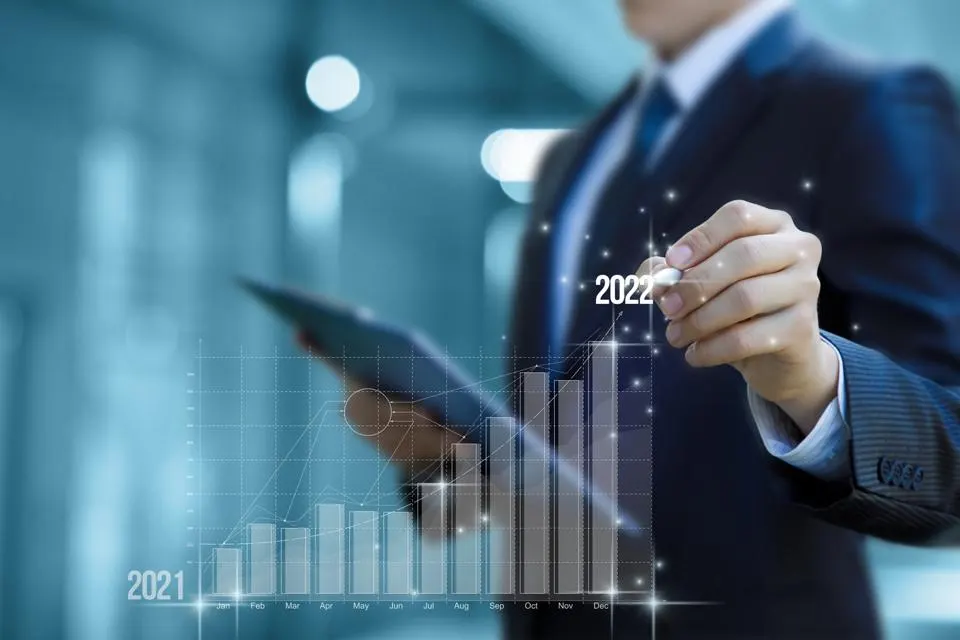

### Abstract
This is an analysis of bank customers that would buy products that the banks are marketing. The bank 
sort to predict their customers that are likely to buy the products they wish to market to them based 
on their unique attributes and financial behaviours.
We will look at how likely is it for a bank customer will buy the product that this bank wish to market 
and potentially sell to them. 
We will be using different models in python machine language to understand out data, clean our data 
and create visual representation of the data we have. 
### Introduction
An average individual in our civilization has at least one bank account at a financial institution, 
which means banking Is path of our day-to-day activity in some sort. 
The financial institutions are seeking ways to further improve banking ease for their individual 
customers, this may cut across selling some sort of products to them and to be able to meet 
this need. 
The banks however are saddled with the responsibility of identifying first what areas can they 
improve their services to their customers, also managing the risk of their customers accepting 
these services, hence improving customers experience and in long run making profit for the 
financial institutions. 
I chose this project because of my personal interest in financial analysis, data in any form I 
believe, is a preview to the unknown. With the use of data, we can understand today’s 
situation and predict based on what we know what tomorrow is likely going to look like. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import requests

Importing data from local system and printing first 5 rows.

In [2]:
predic_f= pd.read_csv('Assignment-2_Data.csv') 
predic_f.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
predic_f.shape
# This shows the number of rows and column in our data (45211 and 18) respectively

(45211, 18)

### Exploratory data analysis (EDA)

In [4]:
predic_f.info ()
# Looking at data;
# age: 9 missing value 
# balance: 3 missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


#### 1.1 Data cleaning 

In [5]:
predic_f.isnull().sum() 
# this code returns the number of null-values in each column, age and balance: 9 and 3 respectively

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#Replacing missing age row with the column mean
age_replace = predic_f["age"].mean() # calculating the mean of "age" column, and assinging to variable "age_replace"
predic_f["age"].fillna(age_replace, inplace= True) # replacing the empty rows in age column with variable "age_replace"

In [7]:
predic_f.isnull().sum() # Now all null values in 'age' has been removed as shown bellow 

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# remove null values left in balance
predic_f.dropna(subset=['balance'], inplace=True) #sebest balance specify where python should look for null value

In [9]:
#lets check null value again
predic_f.isnull().sum() # now empty rows are all dealt with

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### Summary statistics: 
Gives us a quick overview of data 

In [10]:
predic_f.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,23607.499535,40.954292,1362.346620,15.807136,258.169483,2.763958,40.200562,0.580362
std,13050.570626,11.538095,3044.852387,8.322287,257.532086,3.098090,100.131506,2.303513
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12305.750000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23607.500000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34909.250000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# reseting index
predic_f.reset_index(drop=True)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45204,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45205,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45206,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
duplicate = predic_f.duplicated().value_counts() #counting how many duplicate values do we have
print(duplicate) 

False    45208
dtype: int64


In [13]:
#sorting by age
predic_f.sort_values(by=['age'], inplace=True)
predic_f.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45205,46206,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45203,46204,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,46205,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
40887,41888,18.0,student,single,primary,no,608.0,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
41222,42223,18.0,student,single,unknown,no,35.0,no,no,telephone,21,aug,104,2,-1,0,unknown,no


In [14]:
# assign numerical columns to varialble 'numerical_data' 
numerical_data = predic_f.select_dtypes(include="number") 
numerical_data.head()


,Id,age,balance,day,duration,campaign,pdays,previous
45205,46206,-1.0,505.0,17,386,2,-1,0
45203,46204,-1.0,113.0,17,266,1,-1,0
45204,46205,-1.0,2850.0,17,300,1,40,8
40887,41888,18.0,608.0,12,267,1,-1,0
41222,42223,18.0,35.0,21,104,2,-1,0


I sorted the dataframe first in decsending order so i can veiw the lowest and highest values of age on '.head()' and ".tail()" respectively. This will help me to spot potential wrong entries. For example -1 and 999 are impossible ages so we can assume they are wrong.

Using probability plot to clean data

code summary: plot compare the quantiles of the 'numerical columns' of the dataset to the quantiles of a 'normal distribution'

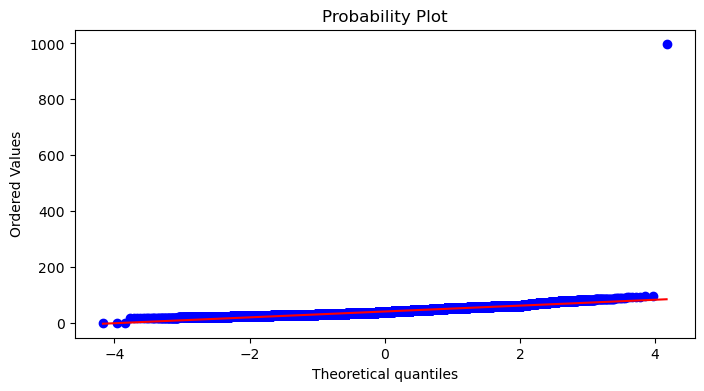

In [15]:
# Creating probability plot for 'age' 
#code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (8, 4) # This set the size of the graph width and height respectively
stats.probplot(predic_f["age"], dist="norm", plot=plt) 
plt.show()
#code summary: plot compare the quantiles of the 'age column' of the dataset to the quantiles of a 'normal distribution'

<Axes: >

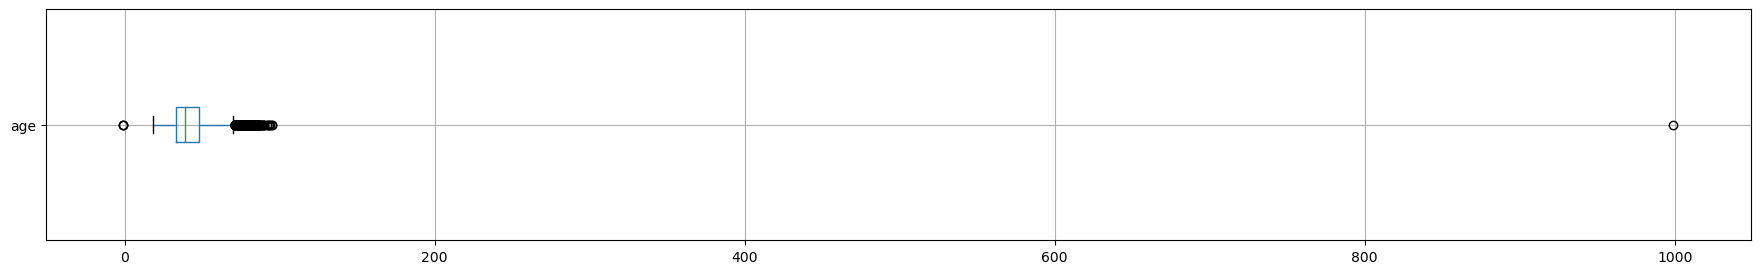

In [16]:
# creating a box sub plot to see plot in numerical form
# code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(predic_f, columns=['age'])
temp_df.boxplot(vert=False)
# Plot shows that 99% of entry are between (0-<200), and 1 towards 1000

In [17]:
#using for loop to iterate the values in age and setting the lowest age at 18years old and higest 120 yeals old
for x in predic_f.index:
  if predic_f.loc[x, "age"] > 120:
    predic_f.loc[x, "age"] = 120
  if predic_f.loc[x, "age"] <= 18:
    predic_f.loc[x, "age"] = 18

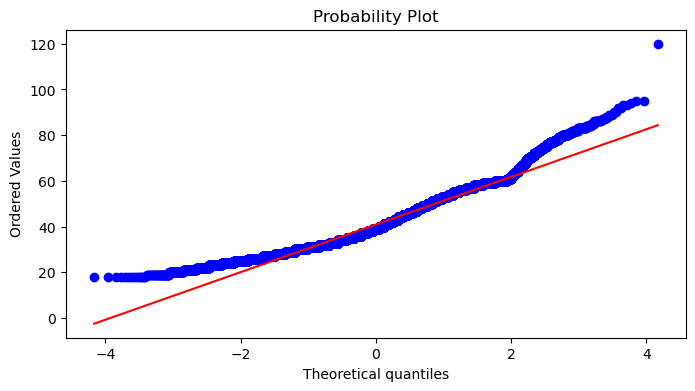

In [18]:
#Checking result visually
# code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (8, 4)
stats.probplot(predic_f["age"], dist="norm", plot=plt)
plt.show()


In [20]:
for x in predic_f.index:
    if predic_f.loc[x,"age"] >= 120:
        predic_f.drop(x, inplace = True)
    if predic_f.loc[x, "age"] <= 18:
        predic_f.loc[x, "age"] = 18

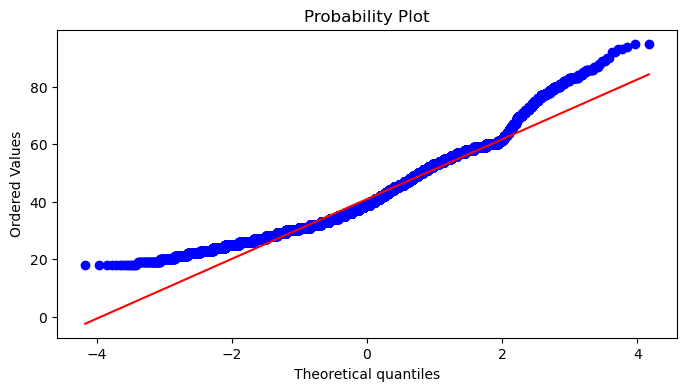

In [21]:
#Checking result visually
plt.rcParams["figure.figsize"] = (8, 4)
stats.probplot(predic_f["age"], dist="norm", plot=plt)
plt.show()

We've removed the unrealistic values in age column using for loop. setting customers age to 18-199 years old inclusive.

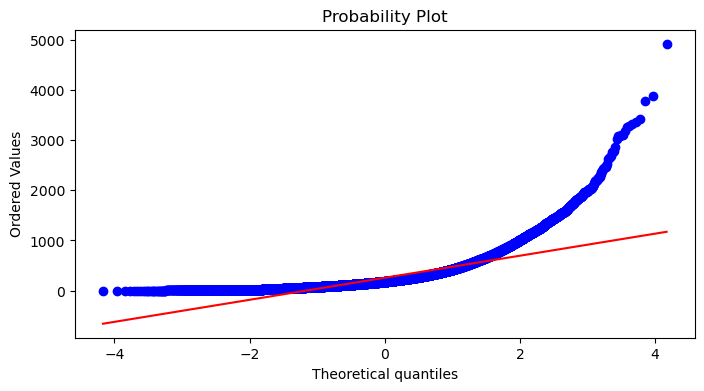

In [22]:
#Plotting duration column 
plt.rcParams["figure.figsize"] = (8, 4)
stats.probplot(predic_f["duration"], dist="norm", plot=plt)
plt.show()

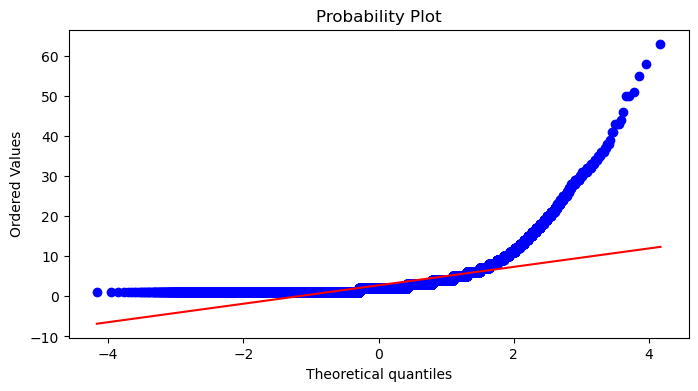

In [23]:
#Plotting campaingn column
plt.rcParams["figure.figsize"] = (8,4)
stats.probplot(predic_f['campaign'], dist ="norm", plot = plt)
plt.show()

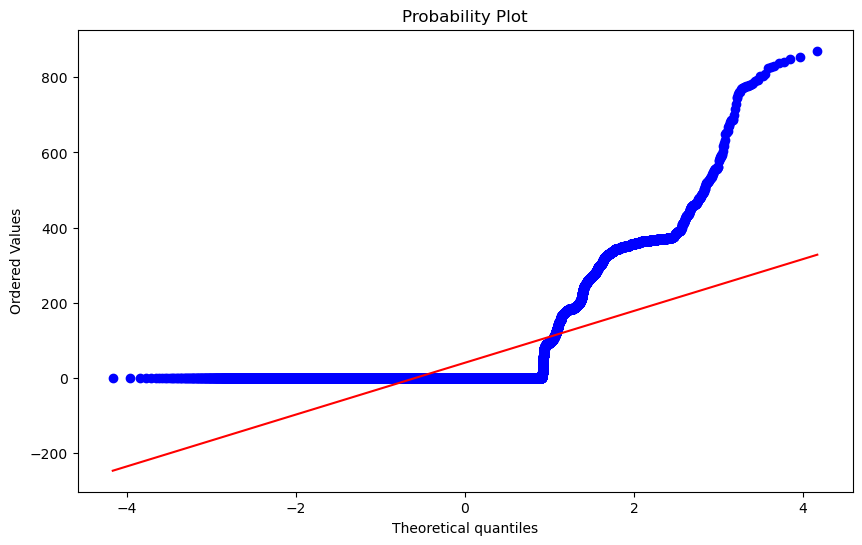

In [24]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(predic_f['pdays'], dist ="norm", plot = plt)
plt.show()

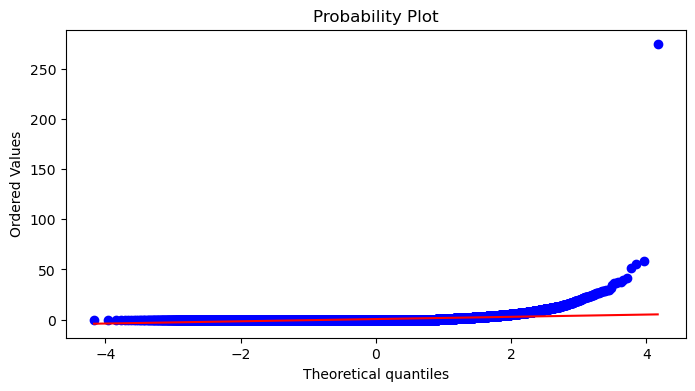

In [25]:
plt.rcParams["figure.figsize"] = (8,4)
stats.probplot(predic_f['previous'], dist ="norm", plot = plt)
plt.show()

In [26]:
for x in predic_f.index:
  if predic_f.loc[x,"previous"] > 55:
    predic_f.drop(x, inplace = True)

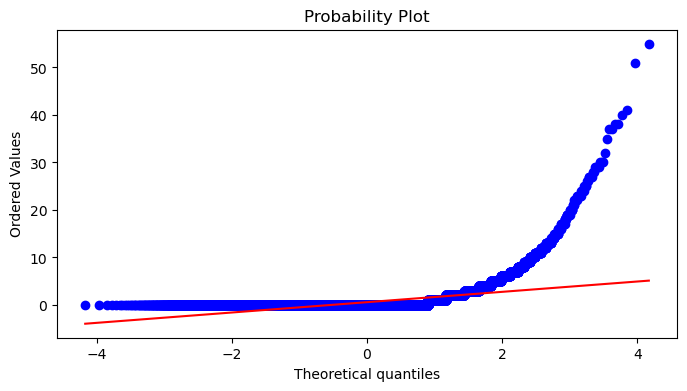

In [27]:
plt.rcParams["figure.figsize"] = (8,4)
stats.probplot(predic_f['previous'], dist ="norm", plot = plt)
plt.show()

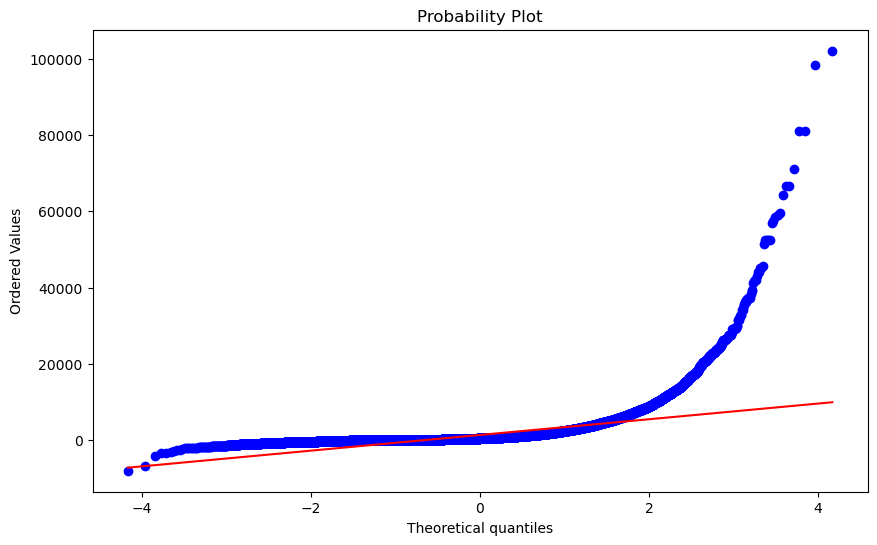

In [28]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(predic_f['balance'], dist ="norm", plot = plt)
plt.show()

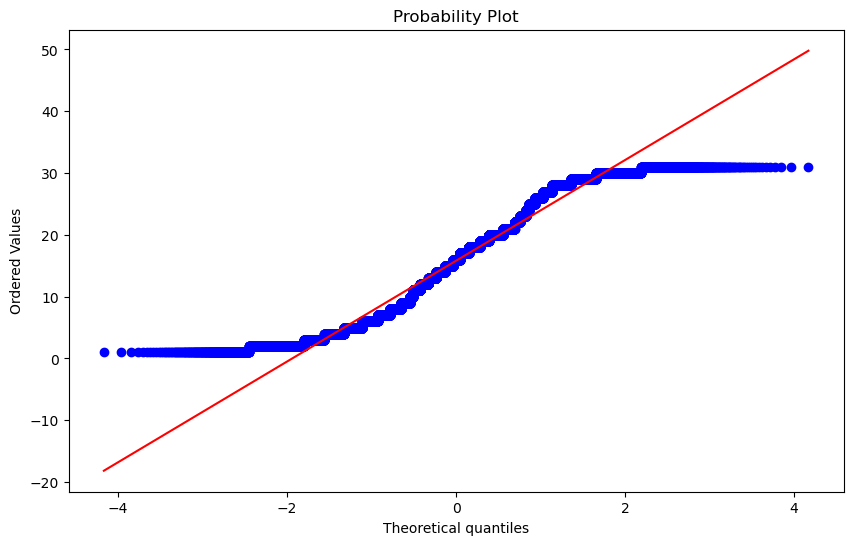

In [29]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(predic_f["day"], dist="norm", plot=plt)
plt.show()

In [30]:
new_numerical = predic_f.select_dtypes(include="number") # assign numerical columns to varialble 'numerical_data' 
new_numerical.head()

,Id,age,balance,day,duration,campaign,pdays,previous
45205,46206,18.0,505.0,17,386,2,-1,0
45203,46204,18.0,113.0,17,266,1,-1,0
45204,46205,18.0,2850.0,17,300,1,40,8
40887,41888,18.0,608.0,12,267,1,-1,0
41222,42223,18.0,35.0,21,104,2,-1,0


In [31]:
# reset 'new_numerical' dataframe indexing.  
new_numerical.reset_index(drop=True)

,Id,age,balance,day,duration,campaign,pdays,previous
0,46206,18.0,505.0,17,386,2,-1,0
1,46204,18.0,113.0,17,266,1,-1,0
2,46205,18.0,2850.0,17,300,1,40,8
3,41888,18.0,608.0,12,267,1,-1,0
4,42223,18.0,35.0,21,104,2,-1,0
...,...,...,...,...,...,...,...,...
45200,45263,93.0,775.0,22,860,2,177,7
45201,45421,93.0,775.0,4,476,2,13,9
45202,32234,94.0,1234.0,3,212,1,-1,0
45203,34700,95.0,2282.0,21,207,17,-1,0


In [32]:
categorical_data1 = predic_f.select_dtypes(exclude="number")
categorical_data1.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
45203,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
45204,retired,married,secondary,no,no,no,cellular,nov,failure,yes
40887,student,single,primary,no,no,no,cellular,aug,unknown,yes
41222,student,single,unknown,no,no,no,telephone,aug,unknown,no


In [33]:
#trail4
all_merge2 = pd.merge(new_numerical,categorical_data1, left_index=True, right_index=True)
all_merge2.head()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
45203,46204,18.0,113.0,17,266,1,-1,0,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
45204,46205,18.0,2850.0,17,300,1,40,8,retired,married,secondary,no,no,no,cellular,nov,failure,yes
40887,41888,18.0,608.0,12,267,1,-1,0,student,single,primary,no,no,no,cellular,aug,unknown,yes
41222,42223,18.0,35.0,21,104,2,-1,0,student,single,unknown,no,no,no,telephone,aug,unknown,no


In [34]:
all_merge2.reset_index(drop=True)

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,46206,18.0,505.0,17,386,2,-1,0,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
1,46204,18.0,113.0,17,266,1,-1,0,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
2,46205,18.0,2850.0,17,300,1,40,8,retired,married,secondary,no,no,no,cellular,nov,failure,yes
3,41888,18.0,608.0,12,267,1,-1,0,student,single,primary,no,no,no,cellular,aug,unknown,yes
4,42223,18.0,35.0,21,104,2,-1,0,student,single,unknown,no,no,no,telephone,aug,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,45263,93.0,775.0,22,860,2,177,7,retired,married,unknown,no,no,no,cellular,jul,success,yes
45201,45421,93.0,775.0,4,476,2,13,9,retired,married,unknown,no,no,no,cellular,aug,success,yes
45202,32234,94.0,1234.0,3,212,1,-1,0,retired,divorced,secondary,no,no,no,cellular,mar,unknown,no
45203,34700,95.0,2282.0,21,207,17,-1,0,retired,divorced,primary,no,no,no,telephone,apr,unknown,yes


In [35]:
new_numerical.corr()

,Id,age,balance,day,duration,campaign,pdays,previous
Id,1.000000,0.014784,0.073624,-0.061658,0.012960,-0.102980,0.437699,0.328205
age,0.014784,1.000000,0.097733,-0.009099,-0.004740,0.004857,-0.023768,0.001102
balance,0.073624,0.097733,1.000000,0.004469,0.021558,-0.014591,0.003448,0.021256
day,-0.061658,-0.009099,0.004469,1.000000,-0.030227,0.162435,-0.093029,-0.057710
duration,0.012960,-0.004740,0.021558,-0.030227,1.000000,-0.084580,-0.001664,-0.000365
campaign,-0.102980,0.004857,-0.014591,0.162435,-0.084580,1.000000,-0.088636,-0.039128
pdays,0.437699,-0.023768,0.003448,-0.093029,-0.001664,-0.088636,1.000000,0.545559
previous,0.328205,0.001102,0.021256,-0.057710,-0.000365,-0.039128,0.545559,1.000000


##### CONVERTING CATEGORICAL DATA INTO NUMERICAL

In [36]:
#Getting dataframe of non numerical data and assigning to variable 'categorical_data' 
categorical_data = predic_f.select_dtypes(exclude="number")
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
45203,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
45204,retired,married,secondary,no,no,no,cellular,nov,failure,yes
40887,student,single,primary,no,no,no,cellular,aug,unknown,yes
41222,student,single,unknown,no,no,no,telephone,aug,unknown,no


In [37]:
# code by: HASSAN , M. (2022)
encoder = LabelEncoder() # Assigning variable encoder to lableEncoder()
categorical_data['job'] = encoder.fit_transform(categorical_data['job']) # assigns a numerical value to each unique value in 'job column'
job = {index : label for index, label in enumerate(encoder.classes_)} # code replaces the original job titles with their corresponding numerical labels using for loop
job # return the dict

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [38]:
categorical_data['marital'] = encoder.fit_transform(categorical_data['marital'])
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

{0: 'divorced', 1: 'married', 2: 'single'}

In [39]:
categorical_data['education'] = encoder.fit_transform(categorical_data['education'])
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

In [40]:
categorical_data['default'] = encoder.fit_transform(categorical_data['default'])
default = {index : label for index, label in enumerate(encoder.classes_)}
default

{0: 'no', 1: 'yes'}

In [41]:
categorical_data['housing'] = encoder.fit_transform(categorical_data['housing'])
housing = {index : label for index, label in enumerate(encoder.classes_)}
housing

{0: 'no', 1: 'yes'}

In [42]:
categorical_data['loan'] = encoder.fit_transform(categorical_data['loan'])
loan = {index : label for index, label in enumerate(encoder.classes_)}
loan

{0: 'no', 1: 'yes'}

In [43]:
categorical_data['contact']=encoder.fit_transform(categorical_data['contact'])
contact={index : label for index,label in enumerate(encoder.classes_)}
contact

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

In [44]:
categorical_data['month'] = encoder.fit_transform(categorical_data['month'])
month = {index : label for index, label in enumerate(encoder.classes_)}
month

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

In [45]:
categorical_data['poutcome'] = encoder.fit_transform(categorical_data['poutcome'])
poutcome = {index : label for index, label in enumerate(encoder.classes_)}
poutcome

{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

In [46]:
categorical_data['y'] = encoder.fit_transform(categorical_data['y'])
y = {index : label for index, label in enumerate(encoder.classes_)}
y

{0: 'no', 1: 'yes'}

In [47]:
# assigning the transformed 'categorical_data' to variable 'new_categorical'
new_categorical = categorical_data # This return a new dataframe containg numerical values as 'keys:' representing str values depending on the column  
new_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,9,2,1,0,0,1,0,9,3,1
45203,8,2,2,0,0,0,0,9,3,1
45204,5,1,1,0,0,0,0,9,0,1
40887,8,2,0,0,0,0,0,1,3,1
41222,8,2,3,0,0,0,1,1,3,0


In [48]:
# checking mising values
new_categorical.isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [49]:
#Indexing
new_categorical.reset_index(drop=True)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,9,2,1,0,0,1,0,9,3,1
1,8,2,2,0,0,0,0,9,3,1
2,5,1,1,0,0,0,0,9,0,1
3,8,2,0,0,0,0,0,1,3,1
4,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
45200,5,1,3,0,0,0,0,5,2,1
45201,5,1,3,0,0,0,0,1,2,1
45202,5,0,1,0,0,0,0,7,3,0
45203,5,0,0,0,0,0,1,0,3,1


# Data Merging 

In [50]:
# We are 'fully' merging new_numerical and new_categorical dataframes together using their 'index' as the key
all_merge = pd.merge(new_numerical,new_categorical, left_index=True, right_index=True)
all_merge.head()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
45203,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
45204,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
40887,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
41222,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0


In [51]:
#Resetting the index for the new joined dataframe 
all_merge.reset_index(drop=True)

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
1,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
2,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
3,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
4,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,45263,93.0,775.0,22,860,2,177,7,5,1,3,0,0,0,0,5,2,1
45201,45421,93.0,775.0,4,476,2,13,9,5,1,3,0,0,0,0,1,2,1
45202,32234,94.0,1234.0,3,212,1,-1,0,5,0,1,0,0,0,0,7,3,0
45203,34700,95.0,2282.0,21,207,17,-1,0,5,0,0,0,0,0,1,0,3,1


In [52]:
#Trying the join syntax
new_numerical.join(new_categorical) 

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
45203,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
45204,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
40887,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
41222,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,45263,93.0,775.0,22,860,2,177,7,5,1,3,0,0,0,0,5,2,1
44420,45421,93.0,775.0,4,476,2,13,9,5,1,3,0,0,0,0,1,2,1
31233,32234,94.0,1234.0,3,212,1,-1,0,5,0,1,0,0,0,0,7,3,0
33699,34700,95.0,2282.0,21,207,17,-1,0,5,0,0,0,0,0,1,0,3,1


In [53]:
# Checking to see all default values were returned, because am seeing only 0s
all_merge.groupby("default").size()
# we have more "no defaulters" than "yes defaulters"

default
0    44391
1      814
dtype: int64

In [54]:
# Check for missing value in our merged dataframe
all_merge.isnull().sum()

Id           0
age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [55]:
# checking for duplicates
dup_after_merge = all_merge.duplicated().value_counts() 
print(dup_after_merge) 

False    45205
dtype: int64


###### Question for data  correlation and visualization
1. Is there a correlation between (defaulters & job)/ (balance & y), (marital & default & y), (age&y)

# **Data correlation**

In [56]:
all_merge.corr()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
Id,1.000000,0.014784,0.073624,-0.061658,0.012960,-0.102980,0.437699,0.328205,0.063073,0.081767,0.094718,-0.052866,-0.176076,-0.084381,-0.722298,-0.161973,-0.445333,0.296234
age,0.014784,1.000000,0.097733,-0.009099,-0.004740,0.004857,-0.023768,0.001102,-0.021898,-0.403225,-0.106746,-0.017884,-0.185438,-0.015534,0.026280,-0.042564,0.007652,0.024759
balance,0.073624,0.097733,1.000000,0.004469,0.021558,-0.014591,0.003448,0.021256,0.018233,0.002108,0.064511,-0.066715,-0.068748,-0.084363,-0.027253,0.019790,-0.020973,0.052840
day,-0.061658,-0.009099,0.004469,1.000000,-0.030227,0.162435,-0.093029,-0.057710,0.022876,-0.005305,0.022714,0.009626,-0.027849,0.011311,-0.027796,-0.005963,0.083464,-0.028403
duration,0.012960,-0.004740,0.021558,-0.030227,1.000000,-0.084580,-0.001664,-0.000365,0.004804,0.011901,0.001919,-0.010106,0.005071,-0.012473,-0.020783,0.006322,0.010986,0.394500
campaign,-0.102980,0.004857,-0.014591,0.162435,-0.084580,1.000000,-0.088636,-0.039128,0.006843,-0.009012,0.006254,0.016918,-0.023546,0.009969,0.019685,-0.109996,0.101601,-0.073185
pdays,0.437699,-0.023768,0.003448,-0.093029,-0.001664,-0.088636,1.000000,0.545559,-0.024377,0.019199,0.000116,-0.029923,0.124133,-0.022912,-0.244746,0.033086,-0.858360,0.103463
previous,0.328205,0.001102,0.021256,-0.057710,-0.000365,-0.039128,0.545559,1.000000,-0.000085,0.019327,0.019201,-0.021794,0.041770,-0.013617,-0.177479,0.029884,-0.591197,0.113033
job,0.063073,-0.021898,0.018233,0.022876,0.004804,0.006843,-0.024377,-0.000085,1.000000,0.061972,0.166730,-0.006740,-0.125368,-0.032949,-0.082121,-0.092876,0.010964,0.040511
marital,0.081767,-0.403225,0.002108,-0.005305,0.011901,-0.009012,0.019199,0.019327,0.061972,1.000000,0.108639,-0.006714,-0.016065,-0.046898,-0.039180,-0.006971,-0.016861,0.045600



# Analysing Data

#### Data visulaisation

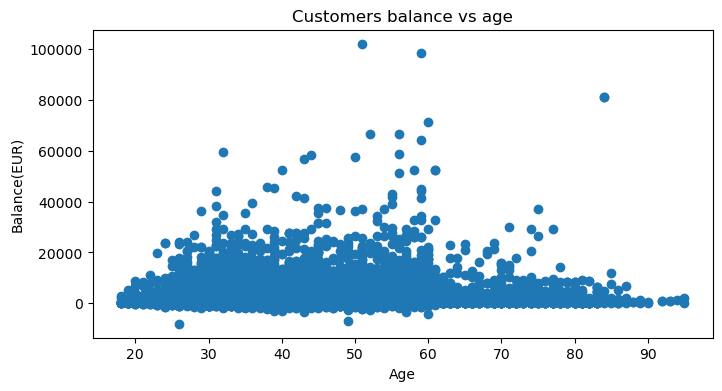

In [57]:
plt.figure(figsize=(8,4))
plt.scatter(all_merge['age'],all_merge['balance'])
plt.xlabel('Age')
plt.ylabel('Balance(EUR)')
plt.title('Customers balance vs age') 
plt.show()
# Insight: Mojority of the customers age(18_ 120)years have their account balance between (0-20,000) euros

Text(0.5, 1.0, 'yes vs balance and age')

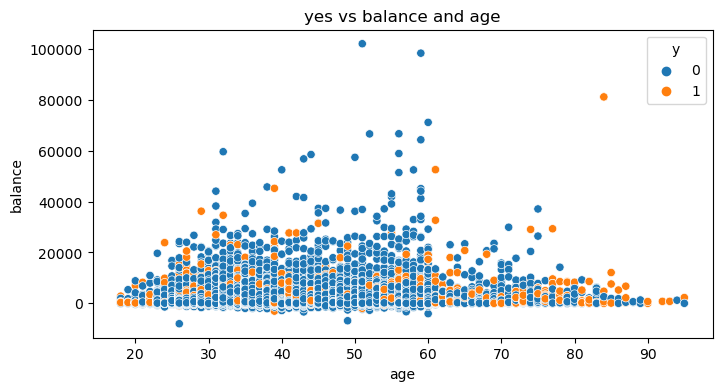

In [58]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='age',y='balance', data=all_merge, hue='y')
plt.title('yes vs balance and age')
#insight: people with balance of (0-20,000) bought services more than others, which this balance have people from all employment background represented according to the 'balance vs employment' plot

Text(0.5, 1.0, 'Defaulters')

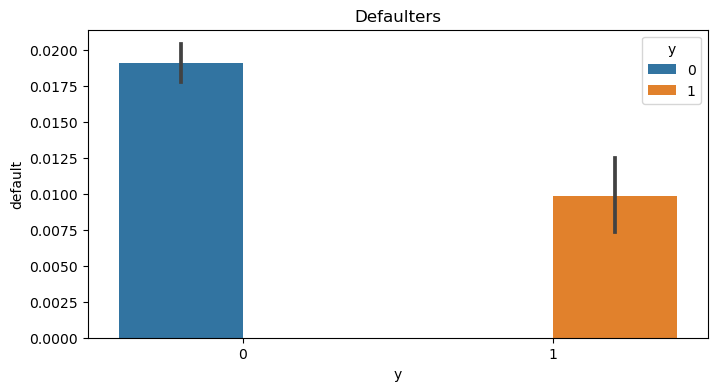

In [59]:
plt.figure(figsize=(8,4))
sns.barplot(x='y',y='default', data=all_merge, hue='y')
plt.title('Defaulters')
#insight: the higher the default the lower the chance of buying because 0.0200 is lower that 0.00 (less defalute more chance of buying)

C:\Users\timay\AppData\Local\Temp\ipykernel_27860\3730766296.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_merge2.groupby('y').mean()['balance'].plot(kind='bar')


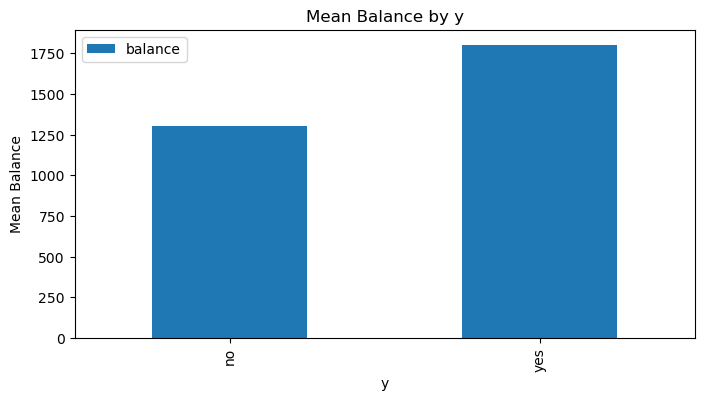

In [60]:

plt.figure(figsize=(8,4))
all_merge2.groupby('y').mean()['balance'].plot(kind='bar')
plt.xlabel('y')
plt.ylabel('Mean Balance')
plt.title('Mean Balance by y')
plt.legend()
plt.show()
# mean of balance improves the chances of buying Averagly, the more customer, the more chances of selling significant number of services, and the lower the less chances of not selling services

Text(0, 0.5, 'Balance')

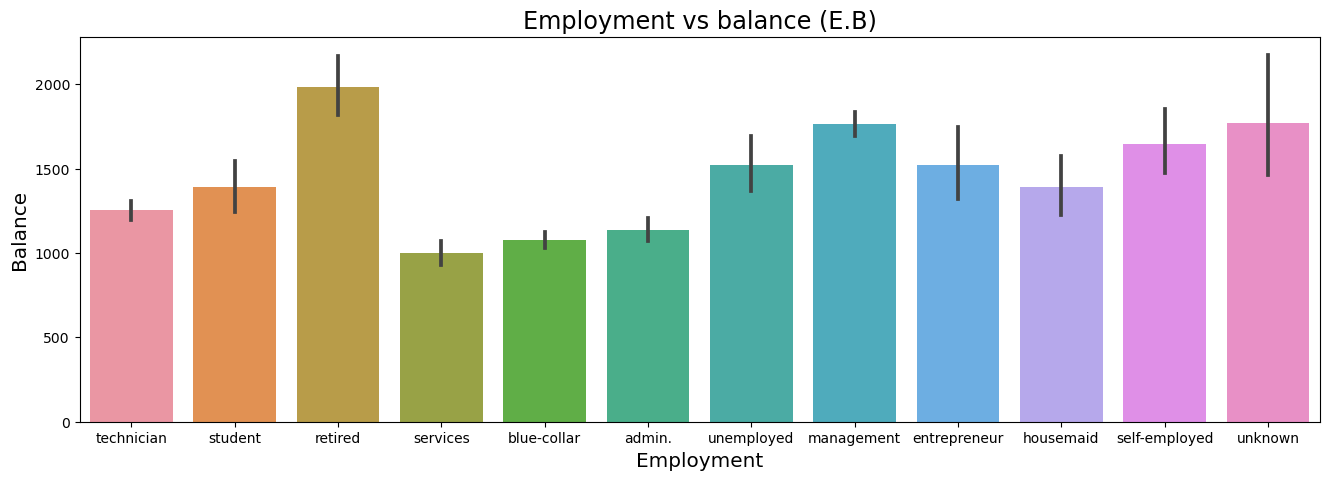

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(data=all_merge2, x='job', y='balance')

plt.title("Employment vs balance (E.B)", size="xx-large")
plt.xlabel("Employment" ,size="x-large")
plt.ylabel("Balance" ,size="x-large")
#Retired people have the higest balance and service eployees have the lowest

Text(0, 0.5, 'Balance')

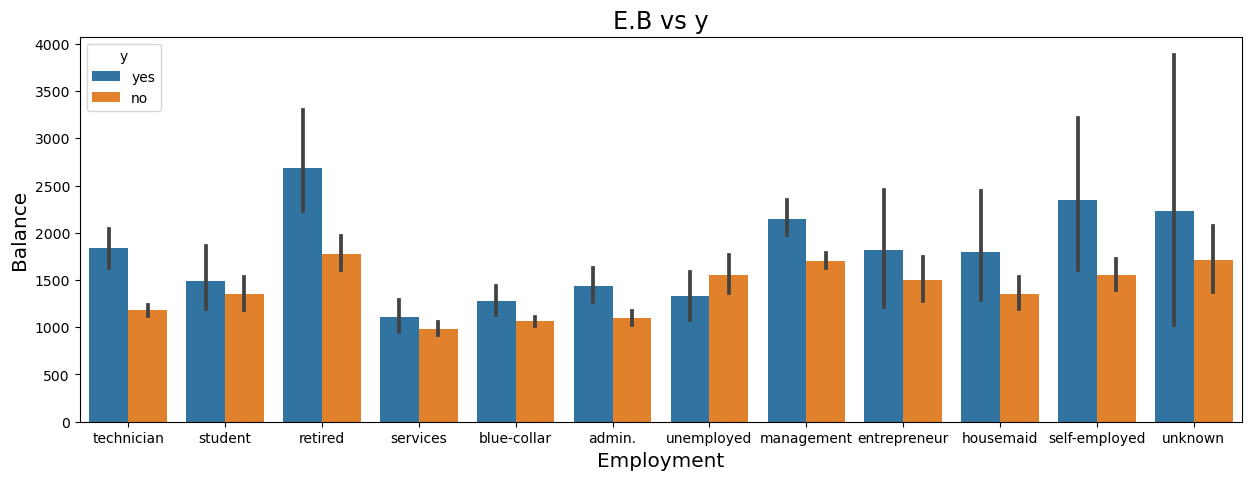

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(data=all_merge2, x='job', y='balance', hue='y')

plt.title("E.B vs y", size="xx-large")
plt.xlabel("Employment" ,size="x-large")
plt.ylabel("Balance" ,size="x-large")
#across all employment, more people has boght the services that those that haven't

### Modeling

In [63]:
all_merge.head()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
45203,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
45204,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
40887,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
41222,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0


In [64]:
data = all_merge.drop(['Id', 'pdays'], axis =1)

In [65]:
data.head()

,age,balance,day,duration,campaign,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,18.0,505.0,17,386,2,0,9,2,1,0,0,1,0,9,3,1
45203,18.0,113.0,17,266,1,0,8,2,2,0,0,0,0,9,3,1
45204,18.0,2850.0,17,300,1,8,5,1,1,0,0,0,0,9,0,1
40887,18.0,608.0,12,267,1,0,8,2,0,0,0,0,0,1,3,1
41222,18.0,35.0,21,104,2,0,8,2,3,0,0,0,1,1,3,0


#### Type: classification problem
#### Model: Randomforest classifier

In [66]:
# Import relevant  libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()

In [68]:
X = data.drop(['y'], axis = 1, inplace = False)
y = data['y']

### Splitting at 20% test(log_df)

In [69]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 5) # 80% training and 20% test


In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((36164, 15), (9041, 15), (36164,), (9041,))

In [71]:
X.head(3)

,age,balance,day,duration,campaign,previous,job,marital,education,default,housing,loan,contact,month,poutcome
45205,18.0,505.0,17,386,2,0,9,2,1,0,0,1,0,9,3
45203,18.0,113.0,17,266,1,0,8,2,2,0,0,0,0,9,3
45204,18.0,2850.0,17,300,1,8,5,1,1,0,0,0,0,9,0


In [72]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred = clf_RF.predict(X_test)

In [74]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8001
           1       0.63      0.41      0.49      1040

    accuracy                           0.90      9041
   macro avg       0.78      0.69      0.72      9041
weighted avg       0.89      0.90      0.89      9041



<Axes: >

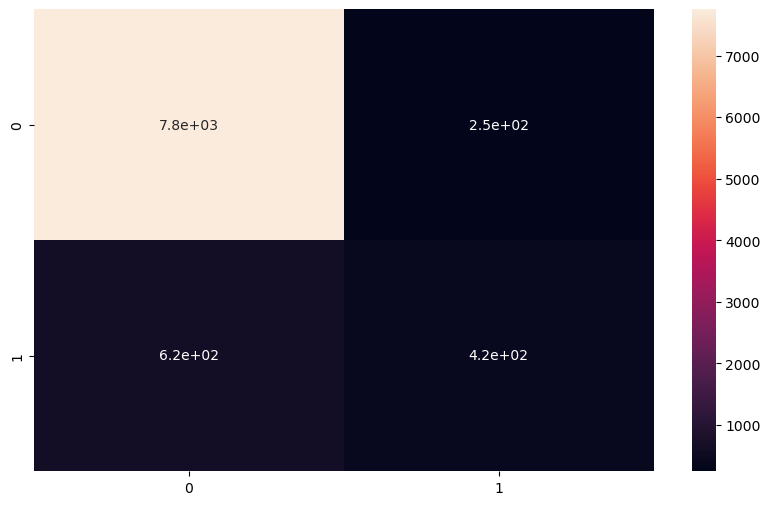

In [75]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [76]:
data['y'].value_counts()

0    39917
1     5288
Name: y, dtype: int64

I did a value count to see the proportion of each class in the target variable. As shown in output, result shows there are 5288 non-subscriber, approximately 8 times less than the subscriber class. This creates an imbalance in the data. Handling the imbalance in the data becomes imperative after the model result shows good accuracy result, however, I did the confusion matrix to see the accuracy of each class prediction, and the result shows that random forest classified model did well classifying the non-subscriber class at (20) % testing size but did very poorly classifying the subscriber class correctly given the same testing size. Both classes at (20) % testing had an average accuracy of 90% but subscriber class had average precision of 62% given the same circumstance. This is because of imbalance in the target, it means the model is bias towards the non-subscriber class because it had more training data for the non-subscriber class than for subscriber class

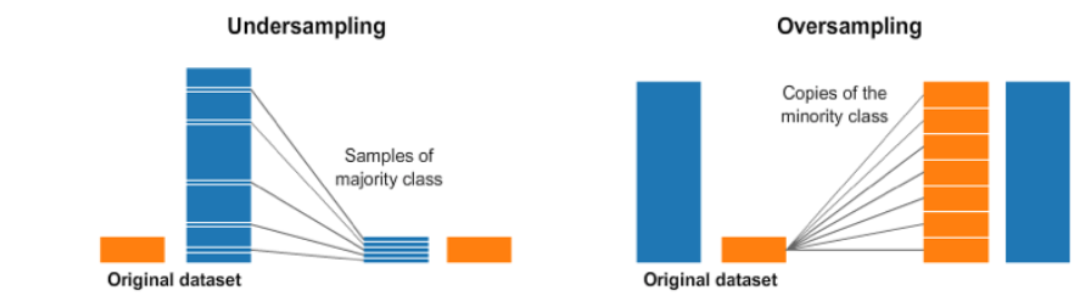

In [77]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [78]:
data.dtypes

age          float64
balance      float64
day            int64
duration       int64
campaign       int64
previous       int64
job            int32
marital        int32
education      int32
default        int32
housing        int32
loan           int32
contact        int32
month          int32
poutcome       int32
y              int32
dtype: object

In [79]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 5)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [80]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((63832, 15), (16002, 15), (63832,), (16002,))

In [81]:
rfc= RandomForestClassifier()

In [82]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred = rfc.predict(X_test)

In [84]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8001
           1       0.92      0.88      0.90      8001

    accuracy                           0.90     16002
   macro avg       0.90      0.90      0.90     16002
weighted avg       0.90      0.90      0.90     16002



In [85]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.899825021872266
Precision: 0.9164280135381411
Accuracy: 0.90
Precision: 0.92


<Axes: >

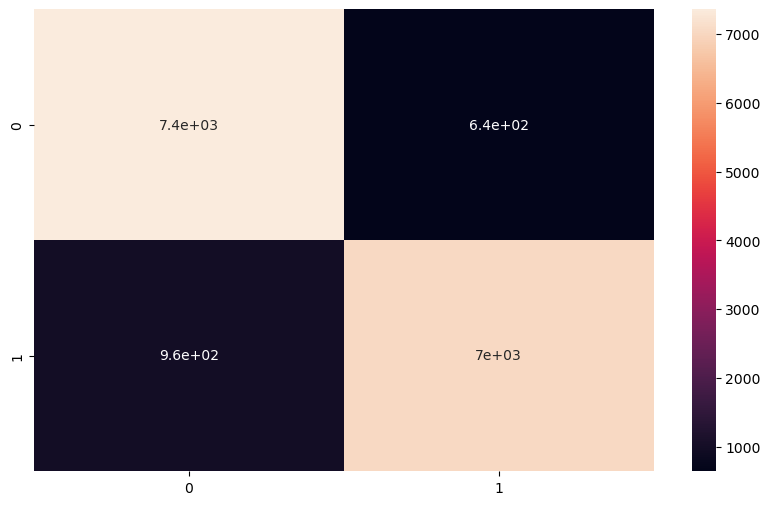

In [86]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

As seen in the results, there is a signifcant improvement to the accuracy, preciSion, recall of the model after the class/target has been balaced uSing SMOTE. 

## API 
#### Domain: Astrology 

In [87]:
#Check if Api is good
data_search = requests.get('http://api.open-notify.org/astros.json')
data_search

<Response [200]>

In [88]:
#get information from api
people_IS= requests.get('http://api.open-notify.org/astros.json')
people_IS.json()

{'message': 'success',
 'people': [{'name': 'Jasmin Moghbeli', 'craft': 'ISS'},
  {'name': 'Andreas Mogensen', 'craft': 'ISS'},
  {'name': 'Satoshi Furukawa', 'craft': 'ISS'},
  {'name': 'Konstantin Borisov', 'craft': 'ISS'},
  {'name': 'Oleg Kononenko', 'craft': 'ISS'},
  {'name': 'Nikolai Chub', 'craft': 'ISS'},
  {'name': "Loral O'Hara", 'craft': 'ISS'}],
 'number': 7}

In [89]:
# api infomation to data frame
space_ppl= pd.DataFrame(people_IS.json())
space_ppl

,message,people,number
0,success,"{'name': 'Jasmin Moghbeli', 'craft': 'ISS'}",7
1,success,"{'name': 'Andreas Mogensen', 'craft': 'ISS'}",7
2,success,"{'name': 'Satoshi Furukawa', 'craft': 'ISS'}",7
3,success,"{'name': 'Konstantin Borisov', 'craft': 'ISS'}",7
4,success,"{'name': 'Oleg Kononenko', 'craft': 'ISS'}",7
5,success,"{'name': 'Nikolai Chub', 'craft': 'ISS'}",7
6,success,"{'name': 'Loral O'Hara', 'craft': 'ISS'}",7


## written pdf report

In [90]:
from IPython.display import display, IFrame

# Path to your PDF file
pdf_path = "http://localhost:8888/files/OneDrive/Desktop/GIt_personal/Data_Preperation-/UCDPA_Ayomide/Ayo%20Project%20Report%20(Bank%20predict).pdf"

# Display the PDF using an iframe
display(IFrame(pdf_path, width=600, height=300))